In [969]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [970]:
df=pd.read_csv('/workspaces/Laptop_Price_Predictor/data/raw/laptop_data.csv')

In [971]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [973]:
df.shape

(3976, 18)

In [974]:
df.dtypes

Unnamed: 0          int64
Brand              object
Name               object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

In [975]:
df.isnull().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [976]:
df.describe()

,Unnamed: 0,Price
count,3976.000000,3976.000000
mean,2181.495724,72432.528672
std,1297.029657,52207.650948
min,0.000000,7990.000000
25%,1058.750000,39873.250000
50%,2098.500000,58990.000000
75%,3342.250000,84990.000000
max,4408.000000,503890.000000


In [977]:
df.describe(include='object')

,Brand,Name,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3976,3976,3976,3976,3976,3976,3976,3976,3976,3976,3968,3972,3976,3976,3976,3558
unique,31,3941,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,ASUS,Lenovo IdeaPad Flex 5 14IRU8 (82Y00051IN) Lapt...,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,989,2,316,3009,2157,1608,1505,331,2034,2205,651,1939,1931,3014,1458,803


In [978]:
for col in df.columns:
  print(f"{col}:{df[col].nunique()} unique values")

Unnamed: 0:3976 unique values
Brand:31 unique values
Name:3941 unique values
Price:1799 unique values
Processor_Name:125 unique values
Processor_Brand:19 unique values
RAM_Expandable:10 unique values
RAM:20 unique values
RAM_TYPE:19 unique values
Ghz:31 unique values
Display_type:2 unique values
Display:34 unique values
GPU:300 unique values
GPU_Brand:11 unique values
SSD:19 unique values
HDD:8 unique values
Adapter:68 unique values
Battery_Life:191 unique values


In [979]:
df=df.drop(columns=['Unnamed: 0'])

## Brand

In [980]:
df['Brand'].value_counts()

Brand
ASUS         989
Lenovo       811
HP           803
Dell         420
Acer         322
MSI          316
Samsung       61
Apple         49
Infinix       39
Microsoft     34
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64

In [981]:
def brd(text):
    B=['RDP','Nokia','VAIO','Lava','Huawei','Razer','Smartron','Tecno','Colorful','Micromax','Coconics','Realme','Wings','Zebronics','Fujitsu']
    if text in B:
        return 'other brand'
    else:
        return text
    

df['Brand']=df['Brand'].apply(brd)
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            3976 non-null   object
 1   Name             3976 non-null   object
 2   Price            3976 non-null   int64 
 3   Processor_Name   3976 non-null   object
 4   Processor_Brand  3976 non-null   object
 5   RAM_Expandable   3976 non-null   object
 6   RAM              3976 non-null   object
 7   RAM_TYPE         3976 non-null   object
 8   Ghz              3976 non-null   object
 9   Display_type     3976 non-null   object
 10  Display          3976 non-null   object
 11  GPU              3968 non-null   object
 12  GPU_Brand        3972 non-null   object
 13  SSD              3976 non-null   object
 14  HDD              3976 non-null   object
 15  Adapter          3976 non-null   object
 16  Battery_Life     3558 non-null   object
dtypes: int64(1), object(16)
memory us

In [982]:
df['Brand'] = df['Brand'].str.strip().str.title()

## Name

## Price

In [983]:
df['Price'] = df['Price'].astype(str).str.replace(',', '').str.extract(r'([\d.]+)').astype(float)

In [984]:
df['Price'] = df['Price'] * 3.5 

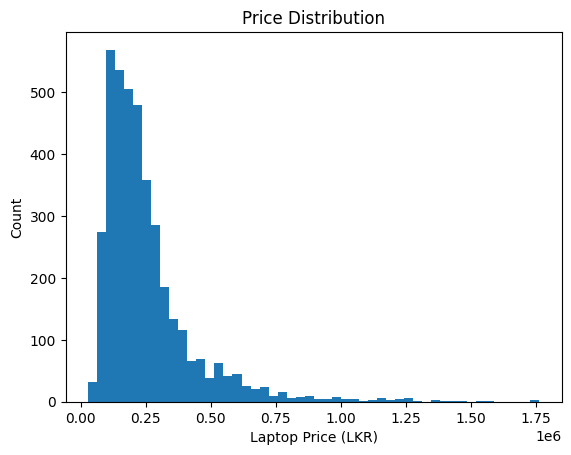

In [985]:
import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=50)
plt.xlabel('Laptop Price (LKR)')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

## Processor Name

In [986]:
df['Processor_Name'].value_counts()

Processor_Name
Intel Core i5 (11th Gen)           316
Intel Core i5 (12th Gen)           294
AMD Hexa-Core Ryzen 5              245
AMD Octa-Core Ryzen 7              239
Intel Core i3 (11th Gen)           189
                                  ... 
Microsoft SQ1 Processor              1
AMD Dual-Core A9 APU Processor       1
AMD Octa-Core Ryzen 9 Processor      1
1.9 Ghz Processor                    1
2.6 Ghz Processor                    1
Name: count, Length: 125, dtype: int64

In [987]:
def split_processor_details(value):
    if pd.isna(value) or str(value).strip() == "":
        return ("Unknown", "Unknown")
    
    text = value.strip()

    
    brand = text.split()[0]

    
    text_before_parenthesis = re.split(r'\(', text)[0].strip()

    
    series = re.sub(rf'^{brand}\s*', '', text_before_parenthesis, flags=re.IGNORECASE).strip()

    return (brand, series)


df[["Processor_Brand_Extracted", "Processor_Series"]] = df["Processor_Name"].apply(lambda x: pd.Series(split_processor_details(x)))

In [988]:
def proc(text):
    if 'Intel' in text:
        if 'i3' in text or 'i5' in text or 'i7' in text or 'i9' in text:
            return " ".join(text.split()[:3])
        else:
            return 'Other Intel'
    elif 'AMD' in text:
        return " ".join(text.split()[:2])
    elif 'Apple' in text:
        return 'Apple'
    else:
        return 'Other Processor'

def gen(text):
    if 'Intel' in text:
        if 'i3' in text or 'i5' in text or 'i7' in text or 'i9' in text:
            if text.split()[3][-2:]=='th':
                return int(text.split('th')[0].split('(')[-1])
            elif text.split()[3][-2:]=='st':
                return int(text.split('st')[0].split('(')[-1])
            elif text.split()[3][-2:]=='nd':
                return int(text.split('nd')[0].split('(')[-1])
            elif text.split()[3][-2:]=='rd':
                return int(text.split('rd')[0].split('(')[-1])
            else:
                return 0
                
        else:
            return 0
    else:
        return 0

def os(text):
    if ('Windows 11' in text.split('|')[3]) or 'Windows 10' in text.split('|')[3] or ('Windows 8.1' in text.split('|')[3]) or ('DOS' in text.split('|')[3]) or ('Linux' in text.split('|')[3]) or ('Ubuntu' in text.split('|')[3]) :
        return text.split('|')[3].strip()
    elif 'macOS' in text.split('|')[3]:
        return 'macOS'
    else:
        return 'Others'
    
    
    
df['processor']=df['Processor_Name'].apply(proc)
df['generation']=df['Processor_Name'].apply(gen)  
df['generation']=df['generation'].astype(np.int16)
df['Operating_System']=df['Name'].apply(os)

## Display

In [989]:
df['Display'].unique()

array(['11.6 ', '15.6 ', '14 ', '16 ', '17.3 ', '13.3 ', '16.1 ', '13.6 ',
       '14.2 ', '14.1 ', '15.3 ', '13.4 ', '15 ', '10.5 ', '13.5 ', '13 ',
       '12.4 ', '16.2 ', 'OLED Display With Touchscreen', '14.0 ', '17 ',
       '18 ', '14.5 ', '12 ', '10.1 ', '15. ', '14.9 ', '11 ', '12.3 ',
       '16.6 ', '12.2 ', '12.5 ', '15.4 ', '12.0 '], dtype=object)

In [990]:
df[df['Display']=='OLED Display With Touchscreen']

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,...,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Brand_Extracted,Processor_Series,processor,generation,Operating_System
774,Hp,HP ENVY 15 ep1087TX (54B88PA) Laptop (| Core i...,662900.0,Intel Core i9 (11th Gen),Intel,Not Expandable,32 GB,DDR4 RAM,4.8 Ghz Processor,LED,...,NVIDIA,1024 GB SSD Storage,No HDD,83,Upto 7.15 Hrs Battery Life,Intel,Core i9,Intel Core i9,11,Windows 11


In [991]:
df.drop(774,inplace=True)

In [992]:
df['Display']=df['Display'].astype(np.float32)

In [993]:
def display_category(x):
    if x <= 14.0:
        return 'Small'
    elif x <= 15.6:
        return 'Medium'
    else:
        return 'Large'

df['Display_Tier'] = df['Display'].apply(display_category)
df['Display_Tier'].value_counts()


Display_Tier
Large     2622
Small     1293
Medium      60
Name: count, dtype: int64

## Adapter

In [994]:
df['Adapter'].unique()

array(['45', '65', '56', 'no', '150', '170', '230', '135', '41', '100',
       '90', '120', '96', '180', '63', '30', '54', '33', '46', '67', '57',
       '43', '48', '70', '37', '24', '42', '330', '200', '58', '240',
       '50', '280', '60', '80', '35', '51', '61', '76', '38', '86', '66',
       '210', '39', '97', '140', '83', '59', '53', '71', '75', '74', '49',
       '300', '68', '52', '40', '36', '32', '15', '26', '47', '64', '130',
       '87', '72', '95', '69'], dtype=object)

In [995]:
def adap(num):
    try:
        return int(num)
    except:
        return np.nan

df['Adapter'] = df['Adapter'].apply(adap)

In [996]:
df['Adapter'].fillna(df['Adapter'].median(), inplace=True)

/tmp/ipykernel_6497/3634911185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Adapter'].fillna(df['Adapter'].median(), inplace=True)


In [997]:
df['Adapter'] = df['Adapter'].astype(np.int32)

## GPU Brand

In [998]:
print(f"Unique Values: {df['GPU_Brand'].unique()}\n")
print(f"Value count for each unique GPU_Brand type: {df['GPU_Brand'].value_counts()}\n")

Unique Values: ['MediaTek' 'AMD' 'NVIDIA' 'Intel' 'Apple' 'Qualcomm' 'NIVIDIA' 'Nvidia'
 'ARM' nan 'Microsoft' 'ATI']

Value count for each unique GPU_Brand type: GPU_Brand
Intel        1939
NVIDIA       1379
AMD           616
Apple          21
Nvidia          8
MediaTek        3
Qualcomm        1
NIVIDIA         1
ARM             1
Microsoft       1
ATI             1
Name: count, dtype: int64



In [999]:
df = df[df['GPU_Brand'].notna()]  
df = df[df['GPU_Brand'].str.strip() != '']  
df = df[~df['GPU_Brand'].str.contains('ATI|MediaTek', case=False, na=False)]  


def clean_gpu_brand(value):
    value = str(value).strip().lower()
    if 'intel' in value:
        return 'Intel'
    elif 'nvidia' in value:
        return 'NVIDIA'
    elif 'amd' in value:
        return 'AMD'
    elif 'apple' in value:
        return 'Apple'
    else:
        return None  
    
df['GPU_Brand'] = df['GPU_Brand'].apply(clean_gpu_brand)


In [1000]:
df = df[df['GPU_Brand'].notna()]

df['GPU_Brand'] = df['GPU_Brand'].astype('category')

print(f"Unique GPU Brands: {df['GPU_Brand'].unique()}")
print(df['GPU_Brand'].value_counts())

Unique GPU Brands: ['AMD', 'NVIDIA', 'Intel', 'Apple']
Categories (4, object): ['AMD', 'Apple', 'Intel', 'NVIDIA']
GPU_Brand
Intel     1939
NVIDIA    1387
AMD        616
Apple       21
Name: count, dtype: int64


## GPU

In [1001]:
def standardize_gpu_name(gpu, brand):
    if pd.isna(gpu) or str(gpu).strip() == '':
        return None
    
    gpu = str(gpu).strip().upper()
    
    # --- Intel ---
    if brand == 'Intel':
        gpu = re.sub(r'^(INTEL\s*)?', '', gpu)
        if 'UHD' in gpu:
            match = re.search(r'UHD\s*(\d+)?', gpu)
            return f"UHD {match.group(1)}" if match and match.group(1) else "UHD Graphics"
        if 'HD' in gpu:
            match = re.search(r'HD\s*(\d+)', gpu)
            return f"HD {match.group(1)}" if match else "HD Graphics"
        if 'IRIS XE' in gpu:
            return "Iris Xe Max" if 'MAX' in gpu else "Iris Xe"
        if 'IRIS PLUS' in gpu:
            return "Iris Plus"
        if 'IRIS PRO' in gpu:
            return "Iris Pro"
        if 'ARC' in gpu:
            match = re.search(r'ARC\s*([A-Z]?\d+M?)', gpu)
            return f"Arc {match.group(1)}" if match else "Arc"
        if 'INTEGRATED' in gpu or gpu in ['GRAPHICS', 'UMA']:
            return "Integrated Graphics"
        return gpu.title()
    
    # --- NVIDIA ---
    if brand == 'NVIDIA':
        gpu = re.sub(r'^GEFORCE\s+', '', gpu)
        gpu = re.sub(r'\s*GPU,?\s*\d+\s*GB?', '', gpu)
        gpu = re.sub(r'MAX[\s-]?Q', 'Max-Q', gpu)
        gpu = re.sub(r'TI\b', 'Ti', gpu)
        rtx = re.search(r'RTX\s*(\d{4})\s*(TI)?', gpu)
        if rtx: return f"RTX {rtx.group(1)}{ ' Ti' if rtx.group(2) else '' }"
        gtx = re.search(r'GTX\s*(\d{4})\s*(TI)?', gpu)
        if gtx: return f"GTX {gtx.group(1)}{ ' Ti' if gtx.group(2) else '' }"
        mx = re.search(r'MX\s*(\d{3})', gpu)
        if mx: return f"MX {mx.group(1)}"
        if 'QUADRO' in gpu: 
            match = re.search(r'QUADRO\s*([A-Z]?\d+)', gpu)
            return f"Quadro {match.group(1)}" if match else "Quadro"
        return gpu.title()
    
    # --- AMD ---
    if brand == 'AMD':
        gpu = re.sub(r'^RADEON\s+', '', gpu)
        rx = re.search(r'RX\s*(\d+[MS]?)', gpu)
        if rx: return f"RX {rx.group(1)}"
        vega = re.search(r'VEGA\s*(\d+)', gpu)
        if vega: return f"Vega {vega.group(1)}"
        rseries = re.search(r'R([2-7])\s*(M?\d*)', gpu)
        if rseries: return f"R{rseries.group(1)} {rseries.group(2)}".strip()
        hd = re.search(r'HD\s*(\d+)', gpu)
        if hd: return f"HD {hd.group(1)}"
        if gpu.upper() in ['INTEGRATED', 'RADEON', 'GRAPHICS']:
            return 'Radeon Graphics'
        return gpu.title()
    
    # --- Apple ---
    if brand == 'Apple':
        if 'M2' in gpu: return 'M2'
        if 'M1' in gpu: return 'M1'
        return gpu.title()
    
    return gpu.title()

df['GPU_Standardized'] = df.apply(lambda row: standardize_gpu_name(row['GPU'], row['GPU_Brand']), axis=1)
df = df[df['GPU_Standardized'].notna()]

In [1002]:
def categorize_gpu_tier(gpu, brand):
    if pd.isna(gpu):
        return None
    gpu_upper = str(gpu).upper()
    
    # Intel
    if brand == 'Intel':
        if any(x in gpu_upper for x in ['ARC A530M','ARC A370M','IRIS XE MAX']):
            return 'Mid-end'
        if any(x in gpu_upper for x in ['IRIS XE','IRIS PLUS','IRIS PRO','ARC']):
            return 'Low-end'
        return 'Entry-level'
    
    # NVIDIA
    if brand == 'NVIDIA':
        high = ['RTX 4070','RTX 4070 TI','RTX 3080','RTX 3080 TI','RTX 3070','RTX 3070 TI','RTX 2080','RTX 2080 TI','RTX 2070','GTX 1080','GTX 1070','QUADRO','RTX A']
        mid = ['RTX 4060','RTX 4060 TI','RTX 4050','RTX 4050 TI','RTX 3060','RTX 3060 TI','RTX 3050','RTX 3050 TI','RTX 2060','RTX 2050','GTX 1660','GTX 1660 TI','GTX 1650','GTX 1650 TI','GTX 1060','GTX 1050','GTX 1050 TI']
        low = ['MX','GT 9','GT 8','GT 7','GTX 960M','GTX 950M','GTX 850M']
        if any(x in gpu_upper for x in high): return 'High-end'
        if any(x in gpu_upper for x in mid): return 'Mid-end'
        if any(x in gpu_upper for x in low): return 'Low-end'
        return 'Entry-level'
    
    # AMD
    if brand == 'AMD':
        high = ['RX 6800','RX 6700','RX 7600']
        mid = ['RX 6600','RX 6550','RX 6500','RX 580','RX 560','RX 5600','RX 5500','R5 M','R7 M','HD 8']
        low = ['VEGA','780M','760M','680M','610M','530','535','520']
        if any(x in gpu_upper for x in high): return 'High-end'
        if any(x in gpu_upper for x in mid): return 'Mid-end'
        if any(x in gpu_upper for x in low): return 'Low-end'
        return 'Entry-level'
    
    # Apple
    if brand == 'Apple':
        return 'High-end'
    
    return None

df['GPU_Tier'] = df.apply(lambda row: categorize_gpu_tier(row['GPU_Standardized'], row['GPU_Brand']), axis=1)
df = df[df['GPU_Tier'].notna()]

In [1003]:
df['GPU_Standardized'] = df['GPU_Standardized'].astype('category')
df['GPU_Tier'] = df['GPU_Tier'].astype('category')

In [1004]:
print("GPU Tier Distribution:")
print(df['GPU_Tier'].value_counts())
print("\nSample GPUs:")
print(df[['GPU_Brand','GPU','GPU_Standardized','GPU_Tier']].head(10))

GPU Tier Distribution:
GPU_Tier
Entry-level    1739
Mid-end        1037
Low-end        1027
High-end        152
Name: count, dtype: int64

Sample GPUs:
   GPU_Brand                         GPU GPU_Standardized     GPU_Tier
1        AMD                      Radeon  Radeon Graphics  Entry-level
2     NVIDIA  GeForce RTX 3050 GPU, 4 GB         RTX 3050      Mid-end
3      Intel                     Iris Xe          Iris Xe      Low-end
4      Intel                         UHD     UHD Graphics  Entry-level
5      Intel                     Iris Xe          Iris Xe      Low-end
6        AMD                      Radeon  Radeon Graphics  Entry-level
7      Intel                     Iris Xe          Iris Xe      Low-end
8      Intel                     UHD 620          UHD 620  Entry-level
9     NVIDIA  GeForce RTX 2050 GPU, 4 GB         RTX 2050      Mid-end
10    NVIDIA  GeForce RTX 4050 GPU, 6 GB         RTX 4050      Mid-end


In [1005]:
unassigned_gpus = df[df['GPU_Tier'].isna()]['GPU'].unique()
print(f"Number of GPUs not assigned a tier: {len(unassigned_gpus)}")
print("Unassigned GPUs:")
print(unassigned_gpus)

Number of GPUs not assigned a tier: 0
Unassigned GPUs:
[]


In [1006]:
df.drop(columns=['GPU'], inplace=True)
df.rename(columns={'GPU_Standardized': 'GPU'}, inplace=True)

## Ram Type

In [1007]:
df['RAM_TYPE'] = df['RAM_TYPE'].str.strip().str.upper()


mapping = {
    'DDR4 RAM': 'DDR4',
    'DDR5 RAM': 'DDR5',
    'DDR3 RAM': 'DDR3',
    'DDR2 RAM': 'DDR2',
    'LPDDR3 RAM' : 'LPDDR3',
    'LPDDR4 RAM': 'LPDDR4',
    'LPDDR4X RAM': 'LPDDR4X',
    'LPDDR5 RAM': 'LPDDR5',
    'LPDDR5X RAM': 'LPDDR5X'
}
df['RAM_TYPE'] = df['RAM_TYPE'].replace(mapping)
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')


In [1008]:
unmapped = df[~df['RAM_TYPE'].isin(mapping.values())]['RAM_TYPE'].unique()
print("Unmapped RAM types:", unmapped)

Unmapped RAM types: ['RAM']
Categories (10, object): ['DDR2', 'DDR3', 'DDR4', 'DDR5', ..., 'LPDDR4X', 'LPDDR5', 'LPDDR5X', 'RAM']


In [1009]:
print(df['RAM_TYPE'].value_counts())
print(df['RAM_TYPE'].cat.categories)

RAM_TYPE
DDR4       2815
DDR5        393
LPDDR5      239
DDR3        153
LPDDR4X     150
LPDDR5X      79
LPDDR3       51
RAM          40
LPDDR4       34
DDR2          1
Name: count, dtype: int64
Index(['DDR2', 'DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X', 'LPDDR5',
       'LPDDR5X', 'RAM'],
      dtype='object')


In [1010]:
df.head()

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,...,Adapter,Battery_Life,Processor_Brand_Extracted,Processor_Series,processor,generation,Operating_System,Display_Tier,GPU,GPU_Tier
1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,127011.5,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4,4.0 Ghz Processor,LCD,...,65,Upto 11 Hrs Battery Life,AMD,Hexa-Core Ryzen 5,AMD Hexa-Core,0,Windows 11,Large,Radeon Graphics,Entry-level
2,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,274750.0,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5,3.3 Ghz Processor,LCD,...,56,Upto 10 Hrs Battery Life,Intel,Core i5,Intel Core i5,12,Windows 11,Large,RTX 3050,Mid-end
3,Hp,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,194215.0,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4,4.2 Ghz Processor,LCD,...,65,Upto 7.30 Hrs Battery Life,Intel,Core i5,Intel Core i5,12,Windows 11,Large,Iris Xe,Low-end
4,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,76965.0,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X,1.7 Ghz Processor,LCD,...,45,Upto 8 Hrs Battery Life,Intel,Core i3,Intel Core i3,11,Windows 11,Large,UHD Graphics,Entry-level
5,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,122465.0,Intel Core i5 (11th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR4,0,LCD,...,45,45W Adapter,Intel,Core i5,Intel Core i5,11,Windows 11,Small,Iris Xe,Low-end


## RAM

In [1011]:
df['RAM'] = df['RAM'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')

In [1012]:
df.rename(columns={'RAM': 'RAM_Size (GB)'}, inplace=True)
print(f"Unique Values: {df['RAM_Size (GB)'].unique()}\n")

Unique Values: [ 8 16  4 32 18 64 12 36  2 24  6  3]



In [1013]:
standard_ram_sizes = [4, 8, 16, 32]
df = df[df["RAM_Size (GB)"].isin(standard_ram_sizes)].reset_index(drop=True)

print(df["RAM_Size (GB)"].value_counts())

RAM_Size (GB)
8     1796
16    1402
4      578
32     137
Name: count, dtype: int64


## Processor Speed

In [1014]:
df['Ghz'] = df['Ghz'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df.rename(columns={'Ghz': 'Processer_Speed(Ghz)'}, inplace=True)

In [1015]:
print(f"Unique Values: {df['Processer_Speed(Ghz)'].unique()}\n")

Unique Values: [4.  3.3 4.2 1.7 0.  2.5 2.2 2.9 3.4 2.6 3.  4.7 3.1 2.7 2.8 2.4 2.1 4.8
 1.2 1.  1.8 2.  1.1 2.3 1.6 0.8 1.3 1.5 1.9 5.5 1.4]



## SSD

In [1016]:
df['SSD'] = df['SSD'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

In [1017]:
df.rename(columns={'SSD': 'SSD(GB)'}, inplace=True)

In [1018]:
standard_sizes = [0, 128, 256, 512, 1024]

# Keep only these values
df = df[df['SSD(GB)'].isin(standard_sizes)]

# Check results
print(df['SSD(GB)'].value_counts())

SSD(GB)
512.0     1935
1024.0     588
256.0      560
128.0      101
Name: count, dtype: int64


In [1019]:
df['SSD(GB)'] = df['SSD(GB)'].fillna(0)

## HDD

In [1020]:
def convert_to_gb(hdd_str):
    if pd.isna(hdd_str) or 'No HDD' in str(hdd_str):
        return 0
    size_unit = re.search(r'(\d+)\s*(GB|TB)', str(hdd_str))
    if size_unit:
        size, unit = float(size_unit.group(1)), size_unit.group(2)
        return size * 1024 if unit == 'TB' else size
    return 0  
df['HDD'] = df['HDD'].apply(convert_to_gb).astype(int)

In [1021]:
df.rename(columns={'HDD': 'HDD(GB)'}, inplace=True)
print(f"Unique Values: {df['HDD(GB)'].unique()}\n")

Unique Values: [   0 1024 2048]



In [1022]:
standard_hdd = [0, 500, 1024]

# Keep only these values
df = df[df['HDD(GB)'].isin(standard_hdd)]

# Check results
print(df['HDD(GB)'].value_counts())

HDD(GB)
0       2906
1024     277
Name: count, dtype: int64


## RAM Expandable

In [1023]:
if 'RAM_Expandable' in df.columns:
    
    df['RAM_Expandable'] = df['RAM_Expandable'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    df['RAM_Expandable'] = pd.to_numeric(df['RAM_Expandable'], errors='coerce')


print("Unique Values:", df['RAM_Expandable'].dropna().unique())

Unique Values: [12. 32.  8. 16.  4. 64. 48.  2.]


In [1024]:
df['RAM_Expandable'] = df['RAM_Expandable'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')

print(df['RAM_Expandable'].value_counts())


RAM_Expandable
No     1719
Yes    1464
Name: count, dtype: int64


## Processor Brand

In [1025]:
print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
print(f"Value count for each unique processor type: {df['Processor_Brand'].value_counts()}")

Unique Values: ['AMD' 'Intel' 'Apple' '2.3' '3.4' '3.3' '1.6' '3.0' '2.6']

Value count for each unique processor type: Processor_Brand
Intel    2390
AMD       767
Apple      18
3.4         2
3.0         2
2.3         1
3.3         1
1.6         1
2.6         1
Name: count, dtype: int64


In [1026]:
# Identify rows where Processor_Brand looks numeric
mask = df['Processor_Brand'].str.match(r'^\d', na=False)

# Display those rows with both columns for comparison
df.loc[mask, ['Processor_Name', 'Processor_Brand', 'Processor_Brand_Extracted']]


,Processor_Name,Processor_Brand,Processor_Brand_Extracted
159,2.3 Ghz Processor,2.3,2.3
279,3.4 Ghz Processor,3.4,3.4
939,3.3 Ghz Processor,3.3,3.3
1344,1.6 Ghz Processor,1.6,1.6
1966,3.4 Ghz Processor,3.4,3.4
2192,3.0 Ghz Processor,3.0,3.0
3650,3.0 Ghz Processor,3.0,3.0
3852,2.6 Ghz Processor,2.6,2.6


In [1027]:
valid_brands = ["AMD", "Apple", "Intel"]

df = df[df["Processor_Brand"].isin(valid_brands)].reset_index(drop=True)
df.shape

(3175, 24)

In [1028]:
import re

def categorize_processor(row):
    name = row['Processor_Series']
    brand = row['Processor_Brand']
    
    if brand == 'Intel':
        # Capture i3/i5/i7/i9 or Core Ultra, Core series, etc.
        match = re.search(r'(i[3579]|core\s*[3579])', name, re.I)
        if match:
            # Standardize naming: convert "core 5" → "i5"
            text = match.group(0).lower()
            if "core" in text:
                # Extract the number after "core"
                num = re.search(r'[3579]', text).group(0)
                return f"Intel Core I{num}"
            else:
                return f"Intel Core {text.upper()}"
        elif re.search(r'Ultra\s*5', name, re.I):
            return "Intel Core Ultra 5"
        elif re.search(r'Ultra\s*7', name, re.I):
            return "Intel Core Ultra 7"
        elif re.search(r'Ultra\s*9', name, re.I):
            return "Intel Core Ultra 9"
        elif re.search(r'Pentium', name, re.I):
            return "Intel Pentium"
        elif re.search(r'Celeron', name, re.I):
            return "Intel Celeron"
        else:
            return "Intel Other"
    
    elif brand == 'AMD':
        # Ryzen families or Athlon/A-series
        match = re.search(r'Ryzen\s*[3579]', name, re.I)
        if match:
            return f"AMD {match.group(0).title()}"
        elif re.search(r'Athlon', name, re.I):
            return "Athlon"
        elif re.search(r'A\d', name, re.I):
            # e.g., A6, A8, A10, A12
            a_match = re.search(r'A\d+', name, re.I)
            return "AMD A-Series"
        else:
            return "AMD Other"
    
    elif brand == 'Apple':
        # All M-series grouped together
        return "Apple M-series"
    
    else:
        return "Other"

# Apply to DataFrame
df['Processor_Series'] = df.apply(categorize_processor, axis=1)

# Quick look at the result
print(df['Processor_Series'].value_counts())


Processor_Series
Intel Core I5         1085
Intel Core I7          612
Intel Core I3          452
AMD Ryzen 5            341
AMD Ryzen 7            266
AMD Ryzen 3             91
Intel Core I9           68
Intel Celeron           58
Intel Core Ultra 7      49
AMD Ryzen 9             44
Intel Core Ultra 5      24
Intel Pentium           22
Apple M-series          18
Athlon                  17
Intel Core Ultra 9      14
AMD A-Series             8
Intel Other              6
Name: count, dtype: int64


In [1029]:
def map_processor_performance(row):
    brand = row['Processor_Brand']
    series   = row['Processor_Series']

    if brand == 'Intel':
        if series in ['Intel Core Ultra 9', 'Intel Core I9']:
            return 'High-End'
        elif series in ['Intel Core I7',  'Intel Core Ultra 7']:
            return 'Upper Mid-End'
        elif series in ['Intel Core I5', 'Intel Core Ultra 5']:
            return 'Mid-End'
        elif series in ['Intel Core I3', 'Intel Celeron', 'Intel Pentium', 'Intel Other']:
            return 'Low-End'

    elif brand == 'AMD':
        if series in ['AMD Ryzen 9']:
            return 'High-End'
        elif series in ['AMD Ryzen 7']:
            return 'Upper Mid-End'
        elif series in ['AMD Ryzen 5']:
            return 'Mid-End'
        elif series in [
            'AMD Ryzen 3', 'Athlon', 'AMD A-Series', 'AMD Other'
        ]:
            return 'Low-End'

    elif brand == 'Apple':
        return 'Apple M-series'  

    return 'Other'  

In [1030]:
df['Processor_Tier'] = df.apply(map_processor_performance, axis=1)
print(df['Processor_Tier'].value_counts())

Processor_Tier
Mid-End           1450
Upper Mid-End      927
Low-End            654
High-End           126
Apple M-series      18
Name: count, dtype: int64


In [1031]:
df.head()

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_Speed(Ghz),Display_type,...,Battery_Life,Processor_Brand_Extracted,Processor_Series,processor,generation,Operating_System,Display_Tier,GPU,GPU_Tier,Processor_Tier
0,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,127011.5,AMD Hexa-Core Ryzen 5,AMD,Yes,8,DDR4,4.0,LCD,...,Upto 11 Hrs Battery Life,AMD,AMD Ryzen 5,AMD Hexa-Core,0,Windows 11,Large,Radeon Graphics,Entry-level,Mid-End
1,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,274750.0,Intel Core i5 (12th Gen),Intel,Yes,16,DDR5,3.3,LCD,...,Upto 10 Hrs Battery Life,Intel,Intel Core I5,Intel Core i5,12,Windows 11,Large,RTX 3050,Mid-end,Mid-End
2,Hp,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,194215.0,Intel Core i5 (12th Gen),Intel,Yes,8,DDR4,4.2,LCD,...,Upto 7.30 Hrs Battery Life,Intel,Intel Core I5,Intel Core i5,12,Windows 11,Large,Iris Xe,Low-end,Mid-End
3,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,76965.0,Intel Core i3 (11th Gen),Intel,No,8,LPDDR4X,1.7,LCD,...,Upto 8 Hrs Battery Life,Intel,Intel Core I3,Intel Core i3,11,Windows 11,Large,UHD Graphics,Entry-level,Low-End
4,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,122465.0,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,DDR4,0.0,LCD,...,45W Adapter,Intel,Intel Core I5,Intel Core i5,11,Windows 11,Small,Iris Xe,Low-end,Mid-End


## Display Type

In [1032]:
df['Display_type'] = df['Display_type'].astype('category')
print(f"Unique Values: {df['Display_type'].unique()}\n")

Unique Values: ['LCD', 'LED']
Categories (2, object): ['LCD', 'LED']



In [1033]:
df.head()

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_Speed(Ghz),Display_type,...,Battery_Life,Processor_Brand_Extracted,Processor_Series,processor,generation,Operating_System,Display_Tier,GPU,GPU_Tier,Processor_Tier
0,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,127011.5,AMD Hexa-Core Ryzen 5,AMD,Yes,8,DDR4,4.0,LCD,...,Upto 11 Hrs Battery Life,AMD,AMD Ryzen 5,AMD Hexa-Core,0,Windows 11,Large,Radeon Graphics,Entry-level,Mid-End
1,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,274750.0,Intel Core i5 (12th Gen),Intel,Yes,16,DDR5,3.3,LCD,...,Upto 10 Hrs Battery Life,Intel,Intel Core I5,Intel Core i5,12,Windows 11,Large,RTX 3050,Mid-end,Mid-End
2,Hp,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,194215.0,Intel Core i5 (12th Gen),Intel,Yes,8,DDR4,4.2,LCD,...,Upto 7.30 Hrs Battery Life,Intel,Intel Core I5,Intel Core i5,12,Windows 11,Large,Iris Xe,Low-end,Mid-End
3,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,76965.0,Intel Core i3 (11th Gen),Intel,No,8,LPDDR4X,1.7,LCD,...,Upto 8 Hrs Battery Life,Intel,Intel Core I3,Intel Core i3,11,Windows 11,Large,UHD Graphics,Entry-level,Low-End
4,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,122465.0,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,DDR4,0.0,LCD,...,45W Adapter,Intel,Intel Core I5,Intel Core i5,11,Windows 11,Small,Iris Xe,Low-end,Mid-End


In [1034]:
cols_to_drop = [
    'Name','Processor_Name','Display','processor','generation','Processor_Series',
    'Adapter', 'Battery_Life', 'Processor_Brand_Extracted'
]
# Drop columns
df = df.drop(columns=cols_to_drop)
# Check the updated DataFrame
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_Speed(Ghz),Display_type,GPU_Brand,SSD(GB),HDD(GB),Operating_System,Display_Tier,GPU,GPU_Tier,Processor_Tier
0,Lenovo,127011.5,AMD,Yes,8,DDR4,4.0,LCD,AMD,512.0,0,Windows 11,Large,Radeon Graphics,Entry-level,Mid-End
1,Dell,274750.0,Intel,Yes,16,DDR5,3.3,LCD,NVIDIA,512.0,0,Windows 11,Large,RTX 3050,Mid-end,Mid-End
2,Hp,194215.0,Intel,Yes,8,DDR4,4.2,LCD,Intel,512.0,0,Windows 11,Large,Iris Xe,Low-end,Mid-End
3,Infinix,76965.0,Intel,No,8,LPDDR4X,1.7,LCD,Intel,512.0,0,Windows 11,Large,UHD Graphics,Entry-level,Low-End
4,Acer,122465.0,Intel,Yes,16,DDR4,0.0,LCD,Intel,512.0,0,Windows 11,Small,Iris Xe,Low-end,Mid-End


In [1035]:
df.shape

(3175, 16)

In [1036]:
df.to_csv('cleaned_laptop_dataset.csv', index=False)